In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
from TESStools import *
from tqdm.notebook import tqdm

We want to put our prewhitening procedure to the test. To do this, we're going to pick a random lightcurve that ISN'T a pulsator, and inject periodic signals into it to see if we can recover them.

In [2]:
merged = pd.read_csv('merged.csv',index_col=0)
pulse = merged[merged['n_peaks'] > 0]
nopulse = merged[merged['n_peaks'] == 0]
nopulse

,RA,Dec,dist,pmRA,pmDec,Tmag,ContRatio,SpT,CommonName,MKType,...,gamma_err_lo,gamma_err_hi,alphaw,alphaw_err_lo,alphaw_err_hi,n_peaks,highest_amp,highest_amp_error,f0,f0_error
182735393,15.655494,-72.273615,0.085619,0.942084,-1.163470,11.1242,NaN,YSG,PMMR 135,G6.5Ia-Iab,...,0.871762,1.005265,0.006127,0.000028,0.000028,0.0,NaN,NaN,NaN,NaN
181453967,13.611989,-72.883290,0.247870,0.693505,-1.225390,11.6794,NaN,YSG,PMMR 67,G7.5Iab,...,0.306646,0.331319,0.004094,0.000013,0.000013,0.0,NaN,NaN,NaN,NaN
182300254,15.225579,-72.860192,0.049163,0.840859,-1.196810,10.7268,NaN,YSG,PMMR 116,G4 Ia,...,0.233368,0.262414,0.006457,0.000031,0.000030,0.0,NaN,NaN,NaN,NaN
231798010,78.285358,-70.139557,0.108215,1.956900,-0.005283,11.6512,NaN,YSG,SP77 39-16,NaN,...,0.136421,0.136200,0.001899,0.000003,0.000003,0.0,NaN,NaN,NaN,NaN
181660065,14.110134,-73.473141,0.035079,0.598909,-1.169640,11.5594,NaN,RSG,SV* HV 1685,K4Ia-Iab,...,0.870406,0.991584,0.005997,0.000161,0.000154,0.0,NaN,NaN,NaN,NaN
40716825,78.578635,-67.263712,0.144428,1.561020,0.209813,10.8872,NaN,YSG,SP77 37-33,NaN,...,0.108263,0.111406,0.001987,0.000003,0.000003,0.0,NaN,NaN,NaN,NaN
181051257,13.148567,-72.851468,0.072718,0.742582,-1.134060,11.8152,NaN,YSG,SkKM 94,K0:III:,...,2.302754,2.255187,0.004111,0.000072,0.000076,0.0,NaN,NaN,NaN,NaN
231743198,78.072353,-67.298458,0.098369,1.526120,0.116848,10.9625,NaN,YSG,SP77 37-19,NaN,...,0.183191,0.202223,0.001941,0.000017,0.000017,0.0,NaN,NaN,NaN,NaN
30322273,74.205977,-69.808753,0.167796,1.861130,-0.158191,10.7841,NaN,YSG,RM 1-77,NaN,...,0.104987,0.102792,0.001840,0.000003,0.000003,0.0,NaN,NaN,NaN,NaN
181878924,14.487013,-73.562152,0.149766,0.431878,-1.063240,11.5522,NaN,YSG,[M2002] SMC 41799,G1Ia-Iab,...,0.343496,0.365854,0.006012,0.000027,0.000028,0.0,NaN,NaN,NaN,NaN


In [8]:
f_in = []
n_f_out = [] 
f_out = []
f_out_err = []
f2_out = []
f2_out_err = []
close = []
amp_in = []
amp_out = []
amp_out_err = []
amp2_out = []
amp2_out_err = []
peak_out = []
peak2_out = []

lc_length = []
alpha = []
tau = []
tmag = []
rms = []
teff = []
lum = []

ntest = 1500
random_state = np.random.RandomState(seed=42)
test_stars = nopulse.sample(n=ntest,random_state=random_state,replace=True)

for tic, star in tqdm(test_stars.iterrows(), total=ntest):
    lc, lc_smooth = lc_extract(get_lc_from_id(tic), smooth=128)
    #if we go across multiple years, only give me Cycle 1
    if lc['Time'].max()-lc['Time'].min() > 365:
        lc = lc[lc['Time'] < 1683]
    time, flux, err = lc['Time'], lc['Flux'], lc['Err']
    lc_length.append(time.max()-time.min())
    alpha.append(star['alpha'])
    tau.append(star['tau'])
    tmag.append(star['Tmag'])
    rms.append(np.sqrt(np.mean(np.power(flux-flux.mean(),2.0))))
    teff.append(star['teff'])
    lum.append(star['lum'])
    
    f_inject = np.random.uniform(low=1/28.0,high=5.0)
    f_in.append(f_inject)
    logamp_inject = np.random.uniform(low=np.log10(0.1*pulse['highest_amp'].min()),high=np.log10(pulse['highest_amp'].max()))
    amp_inject = np.power(10.0,logamp_inject)
    amp_in.append(amp_inject)
    phi_inject = np.random.uniform(low=-np.pi,high=np.pi)
    
    flux_inject = flux + parametrized_sin(time, f_inject, amp_inject, phi_inject)
    
    try:
        good_fs, good_amps, good_phases, good_snrs, good_peaks = prewhiten_harmonic(time, flux_inject, err, max_nfreq=20,
                                                                               verbose=False)
    except:
        print(tic,f_inject,amp_inject)
        continue
    n_f_out.append(len(good_fs))
    if len(good_fs) == 0:
        close.append(0)
        f_out.append(0)
        f_out_err.append(0)
        amp_out.append(0)
        amp_out_err.append(0)
        peak_out.append(0)
        f2_out.append(0)
        f2_out_err.append(0)
        amp2_out.append(0)
        amp2_out_err.append(0)
        peak2_out.append(0)
    else:
        is_close = (good_fs[:,0] - f_inject)/good_fs[:,1]
        close.append(int(np.any(is_close <= 3.0)))
        f_out.append(good_fs[0,0])
        f_out_err.append(good_fs[0,1])
        amp_out.append(good_amps[0,0])
        amp_out_err.append(good_amps[0,1])
        peak_out.append(good_peaks[0])
        if len(good_fs) == 2:
            f2_out.append(good_fs[1,0])
            f2_out_err.append(good_fs[1,1])
            amp2_out.append(good_amps[1,0])
            amp2_out_err.append(good_amps[1,1])
            peak2_out.append(good_peaks[1])
        else:
            f2_out.append(0)
            f2_out_err.append(0)
            amp2_out.append(0)
            amp2_out_err.append(0)
            peak2_out.append(0)
        
    
injection_results = pd.DataFrame({'f_in':f_in,'n_f_out':n_f_out,'close':close,'f_out':f_out,'f_out_err':f_out_err,
                                  'amp_in':amp_in,'amp_out':amp_out,'amp_out_err':amp_out_err,'peak_out':peak_out,
                                  'lc_length':lc_length,'tmag':tmag,'rms':rms,
                                  'alpha':alpha,'tau':tau,'teff':teff,'lum':lum})
injection_results['f2_out'] = f2_out
injection_results['f2_out_err'] = f2_out_err
injection_results['amp2_out'] = amp2_out
injection_results['amp2_out_err'] = f2_out_err
injection_results['peak2_out'] = peak2_out
injection_results.to_csv('injection_results.csv',index=False)

  0%|          | 0/1500 [00:00<?, ?it/s]

/Users/carina/Research/UW/TESS/code/TESStools.py:238: RuntimeWarning: overflow encountered in power
  return alpha_0 / (1.0 + np.power((2.0*np.pi*tau*f),gamma)) + alpha_w
/Users/carina/Research/UW/TESS/code/TESStools.py:238: RuntimeWarning: overflow encountered in power
  return alpha_0 / (1.0 + np.power((2.0*np.pi*tau*f),gamma)) + alpha_w
/Users/carina/Research/UW/TESS/code/TESStools.py:238: RuntimeWarning: overflow encountered in power
  return alpha_0 / (1.0 + np.power((2.0*np.pi*tau*f),gamma)) + alpha_w
/Users/carina/Research/UW/TESS/code/TESStools.py:238: RuntimeWarning: overflow encountered in power
  return alpha_0 / (1.0 + np.power((2.0*np.pi*tau*f),gamma)) + alpha_w
/Users/carina/Research/UW/TESS/code/TESStools.py:238: RuntimeWarning: overflow encountered in power
  return alpha_0 / (1.0 + np.power((2.0*np.pi*tau*f),gamma)) + alpha_w
/Users/carina/Research/UW/TESS/code/TESStools.py:238: RuntimeWarning: overflow encountered in power
  return alpha_0 / (1.0 + np.power((2.0*np.pi

In [23]:
len(injection_results[injection_results['close']==1])/len(injection_results)

0.6233333333333333

(0.0, 5.0)

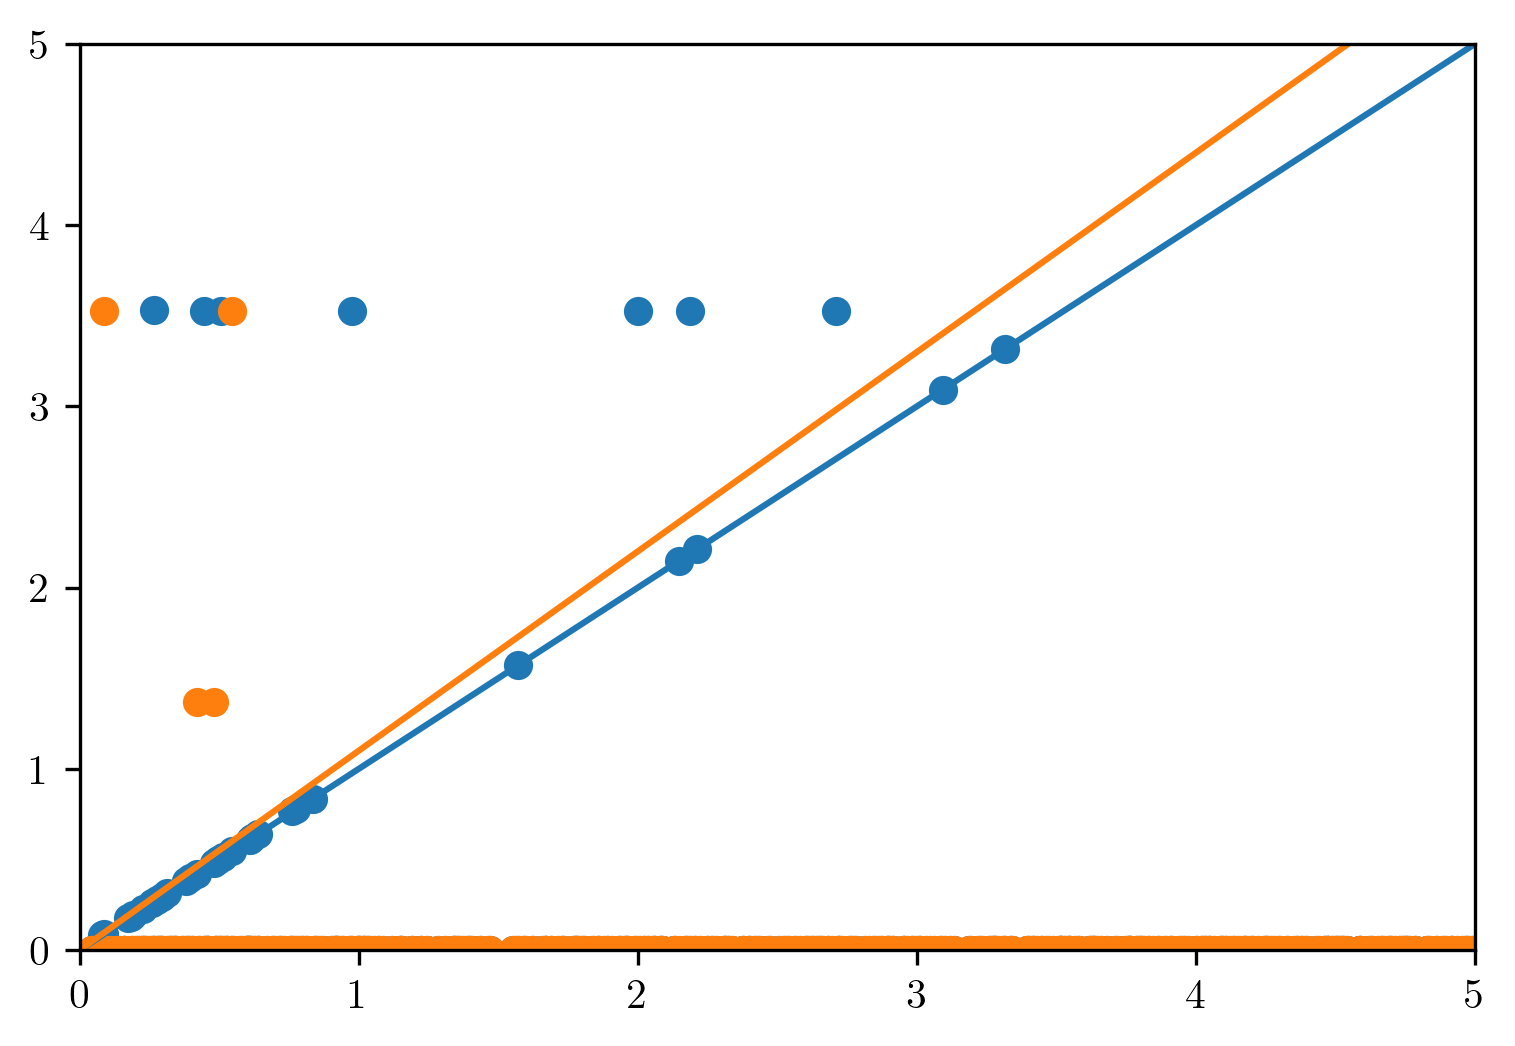

In [20]:
fig = plt.figure(dpi=300)

false = injection_results[injection_results['close'] == 0]
plt.scatter(false['f_in'],false['f_out'])
plt.scatter(false['f_in'],false['f2_out'])
plt.plot([0,5],[0,5])
plt.plot([0,5],[0,1.1*5])

plt.xlim(0,5)
plt.ylim(0,5)

In [22]:
branch = false[(false['f_out']>1.1*false['f_in'])|(false['f2_out']>1.1*false['f_in'])]
branch

,f_in,n_f_out,close,f_out,f_out_err,amp_in,amp_out,amp_out_err,peak_out,lc_length,...,rms,alpha,tau,teff,lum,f2_out,f2_out_err,amp2_out,amp2_out_err,peak2_out
209,2.185793,1,0,3.528650,0.001395,0.000071,0.000380,0.000048,34.277219,49.426475,...,0.006021,0.095174,0.25030,4.123,5.212,0.000000,0.000000,0.000000,0.000000,0.000000
351,2.710391,1,0,3.528678,0.001395,0.000125,0.000380,0.000048,34.248721,49.426475,...,0.006021,0.095174,0.25030,4.123,5.212,0.000000,0.000000,0.000000,0.000000,0.000000
582,0.544780,2,0,0.545545,0.000078,0.011632,0.011140,0.000078,214.743023,49.426475,...,0.006021,0.095174,0.25030,4.123,5.212,3.528604,0.001396,0.000377,0.001396,34.510063
597,0.445755,1,0,3.528655,0.001409,0.000780,0.000379,0.000048,33.992421,49.426475,...,0.006021,0.095174,0.25030,4.123,5.212,0.000000,0.000000,0.000000,0.000000,0.000000
641,0.481223,2,0,0.481247,0.000006,0.005893,0.005846,0.000018,2982.652813,269.709094,...,0.002268,0.019466,0.41932,3.694,4.775,1.370018,0.000154,0.000111,0.000154,33.142330
686,0.976064,1,0,3.528651,0.001401,0.000111,0.000379,0.000048,33.990157,49.426475,...,0.006021,0.095174,0.25030,4.123,5.212,0.000000,0.000000,0.000000,0.000000,0.000000
763,0.264730,1,0,3.529052,0.001442,0.006554,0.000394,0.000051,35.857742,49.426475,...,0.006021,0.095174,0.25030,4.123,5.212,0.000000,0.000000,0.000000,0.000000,0.000000
800,0.418459,2,0,0.418482,0.000006,0.008264,0.008223,0.000023,2479.092843,269.709094,...,0.002268,0.019466,0.41932,3.694,4.775,1.370022,0.000154,0.000112,0.000154,33.420014
1259,2.002003,1,0,3.528650,0.001399,0.000009,0.000379,0.000048,34.123026,49.426475,...,0.006021,0.095174,0.25030,4.123,5.212,0.000000,0.000000,0.000000,0.000000,0.000000
1269,0.086965,2,0,0.087222,0.000063,0.071710,0.069979,0.000396,71.858447,49.426475,...,0.006021,0.095174,0.25030,4.123,5.212,3.528516,0.001204,0.000387,0.001204,34.443414


# Looks like we introduce spurious frequencies when the lightcurve length is small. Interesting... We also do a damn good job of picking up frequencies. And doing a cut just on light curve length doesn't change the numbers at all.

In [7]:
len(good_fs)

1

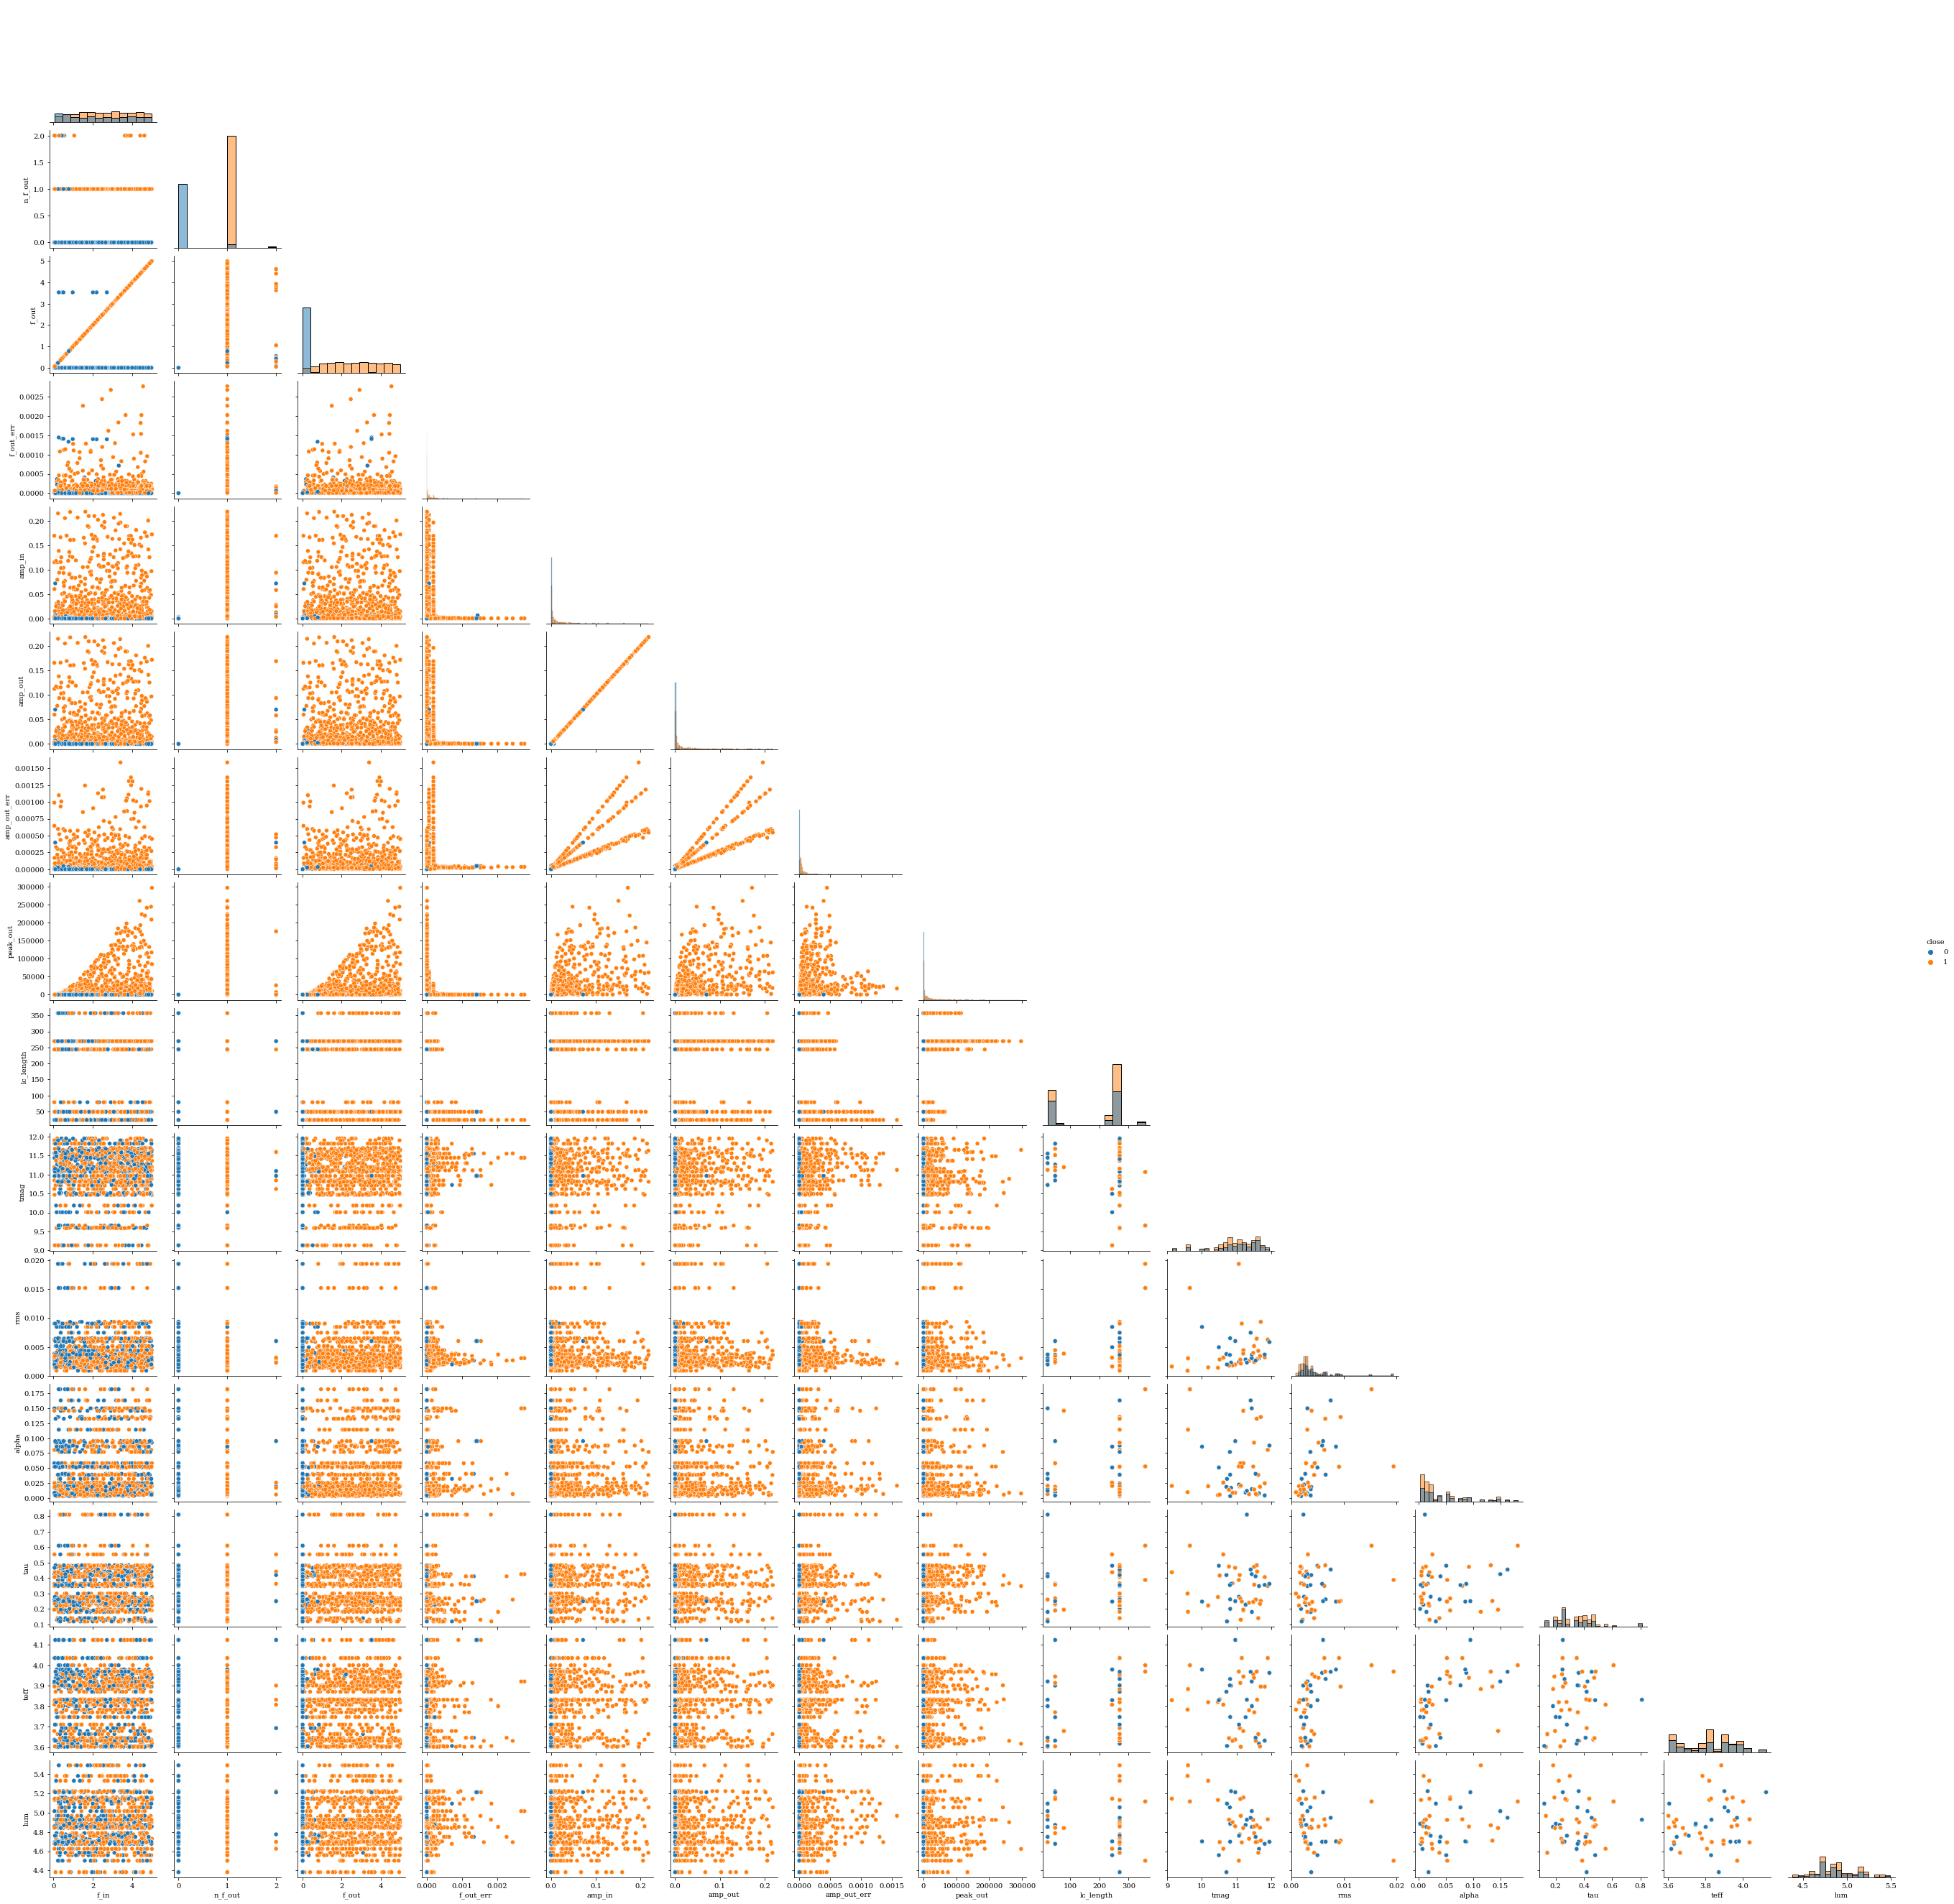

In [10]:
import seaborn as sns
plt.rcParams.update({
    "text.usetex": False})
sns.pairplot(injection_results,hue='close',diag_kind='hist',corner=True)
plt.rcParams.update({
    "text.usetex": True})
plt.savefig('pairplot.pdf')